In [1]:
import pandas as pd
p_only = pd.read_hdf("results/df1.h5", 'p_only')
results=pd.read_hdf('results/df4.h5', 'results')

In [2]:
#Because the results that we saved contains all the strings, we need to eliminate all the "%" at the end of each data
for i in range(len(results)):
    results.loc[:,"Clinton %"][i] = results.loc[:, "Clinton %"][i].replace("%", "")
    results.loc[:,"Trump %"][i] = results.loc[:, "Trump %"][i].replace("%", "")
#using for loop for both Clinton and Trump coloumns to delete % signs.
results.head()

,State,Clinton %,Trump %
0,Arizona,45.1,48.7
1,Colorado,48.2,43.3
2,Florida,47.8,49.0
3,Iowa,41.7,51.1
4,Maine,47.8,44.9


In [3]:
#right now, we need to change the type of those data into numbers, as numeric type
results["Clinton %"] = pd.to_numeric(results["Clinton %"])
results["Trump %"] = pd.to_numeric(results["Trump %"])

In [6]:
#create an item called state_dic, which linked each state name with their abbreviation.
state_dict = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA', 'Colorado':'CO',
              'Connecticut':'CT', 'Delaware':'DE', 'District of Columbia':'DC', 'Florida':'FL', 'Georgia':'GA',
              'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY',
              'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN',
              'Mississippi':'MS', 'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH',
              'New Jersey':'NJ', 'New Mexico':'NM', 'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND',
              'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC',
              'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA',
              'Washington':'WA', 'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY'}

#If we look through the data, our dataframep_only contains 57 states which includes Maine three times, and Nebraska 3 times
#We combine and delete the data from those states in our dataframe
#removedata = ['Maine CD-1', 'Maine CD-2', 'Nebraska CD-1', 'Nebraska CD-2', 'Nebraska CD-3', 'U.S.']
#if state in ['Maine CD-1', 'Maine CD-2']:
        #state = 'Maine'
#elif State in ['Nebraska CD-1', 'Nebraska CD-2', 'Nebraska CD-3']:
        #state = 'Nebraska'

#Iterate through dictionary of states; for each state, subset all polls conducted in the state and sum the votes for Clinton
#and for Trump. Then add the results to a new dictionary data_list.
data_list = []
for state, code in state_dict.items():
    dict1 = {}
    samplesize = p_only[p_only.loc[:,'state']==state].loc[:,'samplesize']
    clinton = p_only[p_only.loc[:,'state']==state].loc[:,'adjpoll_clinton']
    trump = p_only[p_only.loc[:,'state']==state].loc[:,'adjpoll_trump']
    dict1['state'] = state
    dict1['code'] = code
    dict1['samplesize'] = samplesize.sum()
    dict1['clinton'] = (clinton * samplesize).sum() #Aggregating Clinton poll votes
    dict1['trump'] = (trump * samplesize).sum()     #Aggregating Trump poll votes
    data_list.append(dict1)
    
#Create a new DataFrame from data_list, and calculate percentages from the aggregate votes.
#Later, we will compare the percentage change in data
df_diff = pd.DataFrame(data_list, columns=['code', 'state', 'samplesize', 'clinton', 'trump'])
df_diff.loc[:,'clinton_pct'] = df_diff.loc[:,'clinton']/df_diff.loc[:,'samplesize']
df_diff.loc[:,'trump_pct'] = df_diff.loc[:,'trump']/df_diff.loc[:,'samplesize']
df_diff.head()

,code,state,samplesize,clinton,trump,clinton_pct,trump_pct
0,AL,Alabama,27153.0,8.992856e+05,1.570689e+06,33.119197,57.845873
1,AK,Alaska,12240.0,4.309978e+05,5.495426e+05,35.212235,44.897274
2,AZ,Arizona,69177.0,2.919496e+06,3.068696e+06,42.203272,44.360056
3,AR,Arkansas,17965.0,6.353103e+05,9.472248e+05,35.363781,52.726123
4,CA,California,103154.0,5.588077e+06,3.374816e+06,54.172181,32.716288


In [7]:
#use the results we read at the begining and sorted the values so that both data could match with the alphabatic order
results = results.sort_values('State')
results = results.reset_index(drop=True)
results.head()

,State,Clinton %,Trump %
0,Alabama,34.4,62.1
1,Alaska,36.6,51.3
2,Arizona,45.1,48.7
3,Arkansas,33.7,60.6
4,California,61.7,31.6


In [8]:
#Calculating differences between the acutal results and polls prediction
df_diff['clinton_diff'] = results['Clinton %'] - df_diff['clinton_pct']
df_diff['trump_diff'] = results['Trump %'] - df_diff['trump_pct']
df_diff.head()
#let's see what is the difference of voting

,code,state,samplesize,clinton,trump,clinton_pct,trump_pct,clinton_diff,trump_diff
0,AL,Alabama,27153.0,8.992856e+05,1.570689e+06,33.119197,57.845873,1.280803,4.254127
1,AK,Alaska,12240.0,4.309978e+05,5.495426e+05,35.212235,44.897274,1.387765,6.402726
2,AZ,Arizona,69177.0,2.919496e+06,3.068696e+06,42.203272,44.360056,2.896728,4.339944
3,AR,Arkansas,17965.0,6.353103e+05,9.472248e+05,35.363781,52.726123,-1.663781,7.873877
4,CA,California,103154.0,5.588077e+06,3.374816e+06,54.172181,32.716288,7.527819,-1.116288


In [14]:
df_diff['state'].dtype

dtype('O')

In [9]:
#now we want to visualize the differences between votings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

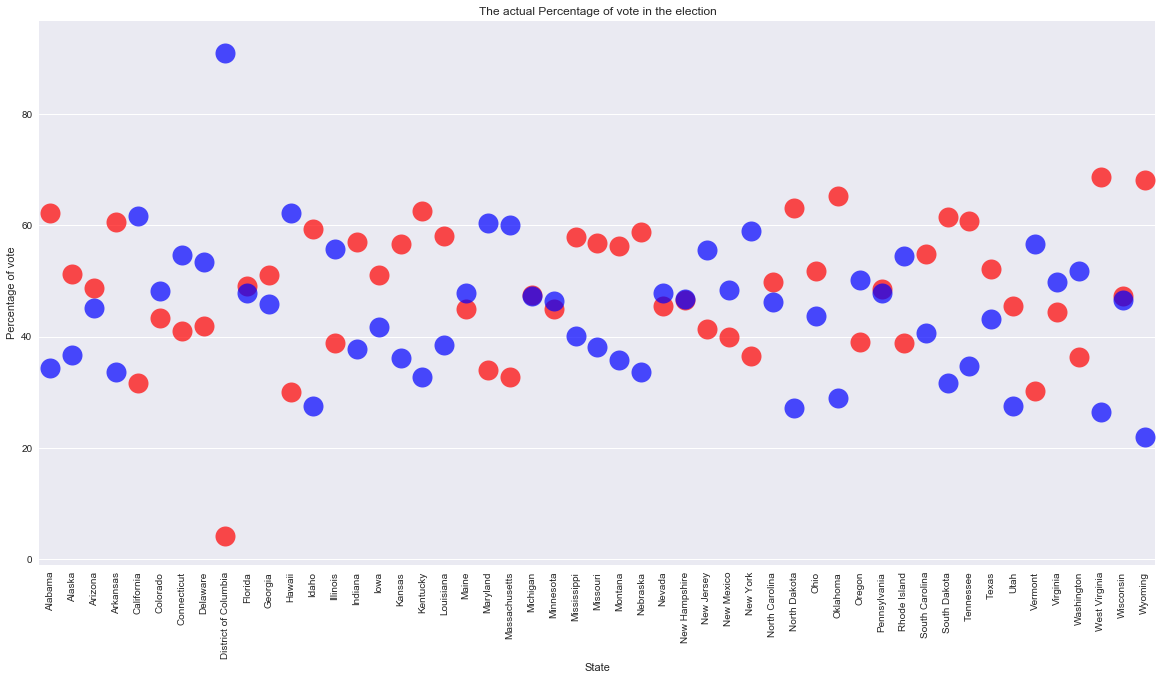

In [28]:
fig,axes= plt.subplots(figsize=(20,10))
p1=sns.stripplot(x="State", y="Trump %", data=results,color="red",size=20,alpha=0.7)
p2=sns.stripplot(x="State", y="Clinton %", data=results,color="blue",size=20,alpha=0.7)
axes.set_title('The actual Percentage of vote in the election')
axes.set_ylabel("Percentage of vote")
axes.set_xlabel("State")
#we draw the graph that shows the percentage of votes in each state for Clinton and Trump
plt.setp(axes.xaxis.get_majorticklabels(), rotation=90);

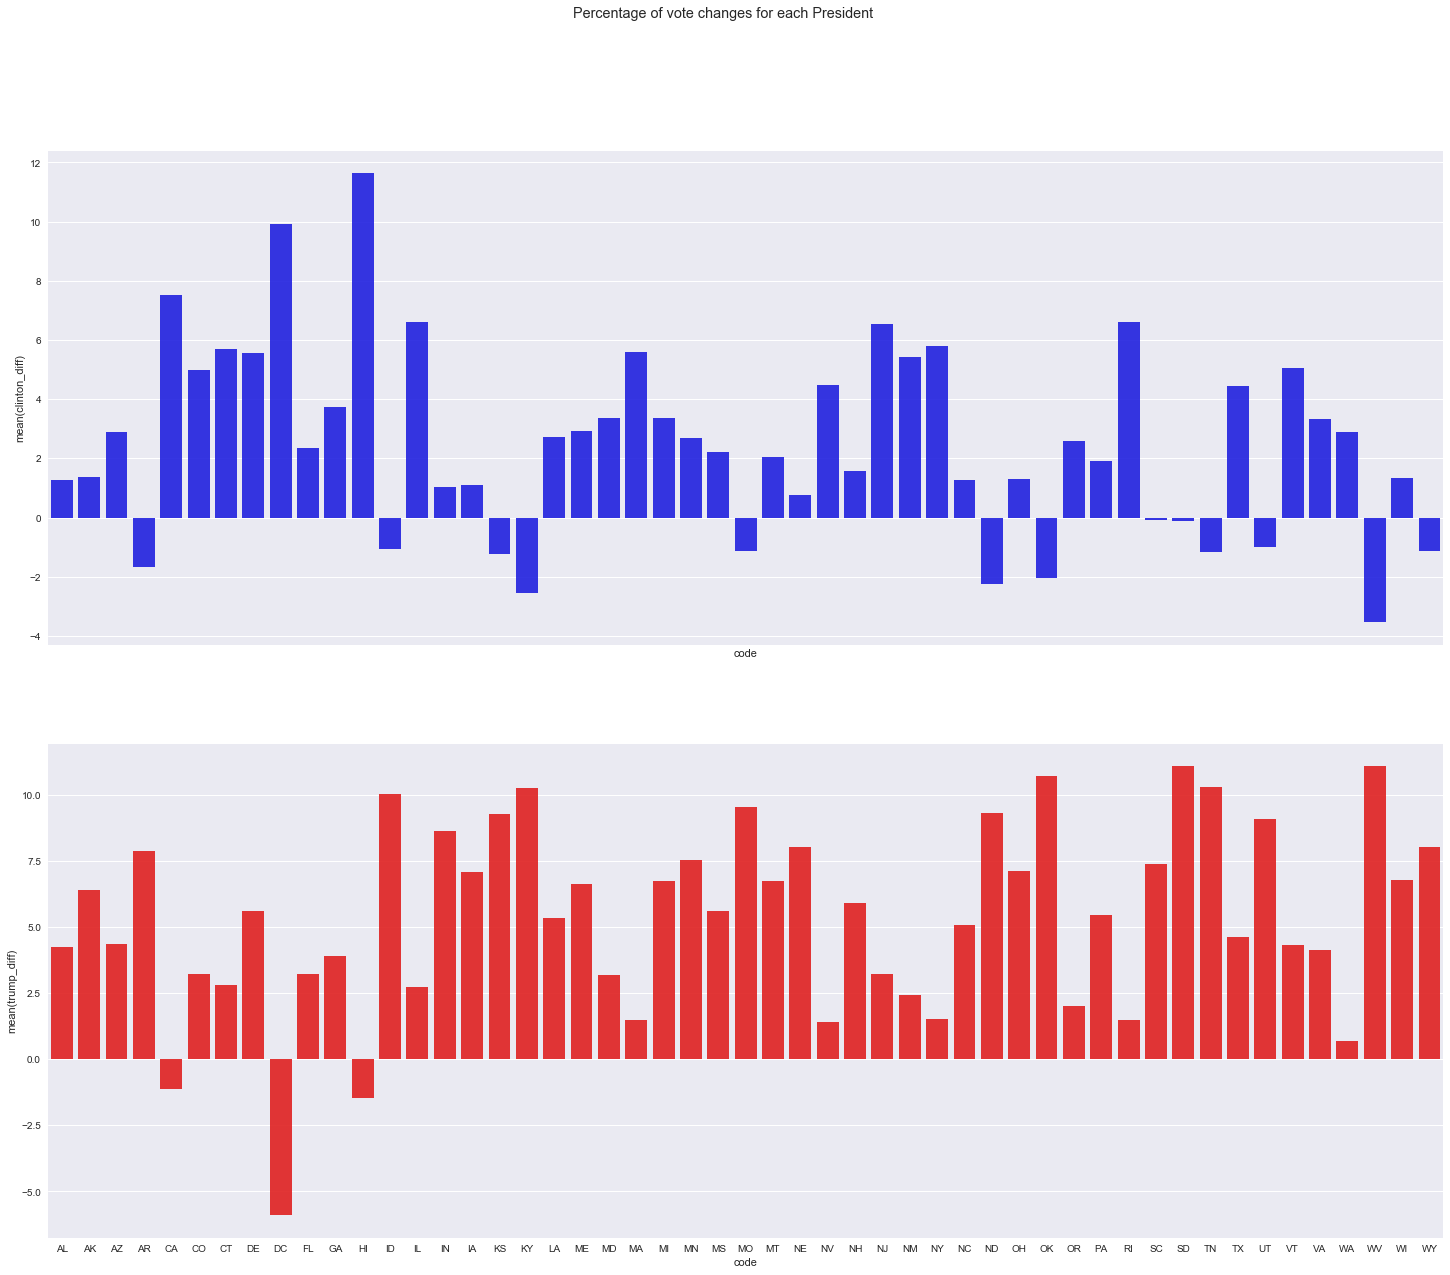

In [46]:
#now let's draw the differences of percentage each president got
fig,axes= plt.subplots(2,1,figsize=(25,20), sharex=True)
fig.suptitle('Percentage of vote changes for each President')
sns.barplot(x="code",y="clinton_diff",data=df_diff,color="blue",alpha=0.9,ax=axes[0])
sns.barplot(x="code",y="trump_diff",data=df_diff,color="red",alpha=0.9,ax=axes[1])

